# Введение

Оператор мобильной связи "Мегалайн" выяснил, что многие из его клиентов продолжают пользоваться архивными тарифами. Для улучшения предложений и удовлетворения потребностей клиентов, "Мегалайн" решил построить систему, которая сможет анализировать поведение клиентов и предлагать им наиболее подходящий тариф: "Смарт" или "Ультра". В рамках данного проекта у нас есть данные о поведении клиентов, которые уже перешли на один из этих тарифов.

Целью проекта является построение модели для задачи классификации, которая будет определять наиболее подходящий тариф для клиента на основе его поведения. Основной метрикой успеха проекта является точность (accuracy) модели, которую необходимо увеличить до минимум 0.75.

Для достижения поставленной цели, мы разделим исходные данные на обучающую, валидационную и тестовую выборки. Затем мы исследуем качество различных моделей, проводя эксперименты с разными гиперпараметрами. В итоге, мы проверим качество нашей модели на тестовой выборке и сделаем выводы о ее эффективности.

Дополнительным заданием является проверка модели на вменяемость, что также будет учтено в исследовании.

# Описание данных

Набор данных представляет собой информацию о поведении одного пользователя за месяц. Для каждого пользователя известны следующие параметры:

- `calls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество SMS-сообщений,
- `mb_used` — объем израсходованного интернет-трафика в мегабайтах,
- `is_ultra` — тип используемого тарифа ("Ультра" — 1, "Смарт" — 0).

## Импорт библиотек

In [31]:
RANDOM_STATE=12345
import pandas as pd
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

## Импорт данных

In [4]:
#Импорт данных
try:
    df=pd.read_csv('/datasets/users_behavior.csv',sep=',')
except:
    df=pd.read_csv(r'C:\Users\Admin\Desktop\mch\users_behavior.csv',sep=',')

## Выбор признаков

In [5]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [9]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Массив представлен численными признаками 

Определим  признак `is_ultra` в качестве целевого 


По условию задачи предобработка не требуется.


Построим корреляционную матрицу

In [16]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

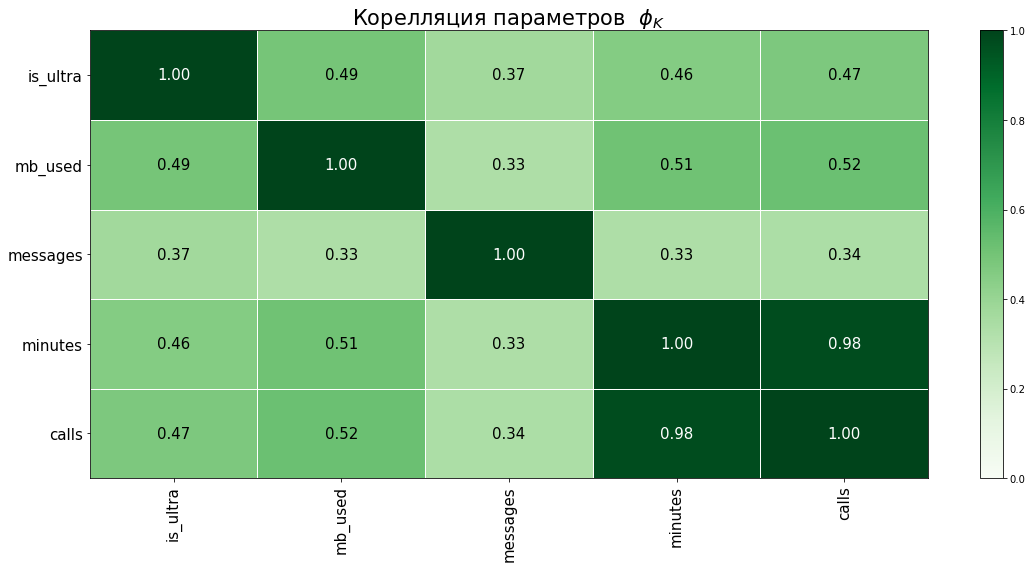

In [17]:
phik_corrs = df.phik_matrix(interval_cols=numerical_columns)
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

**Вывод**
признаки `minutes` и `calls` созависимы, соответственно, потребуется оставить один из них

Оставим `minutes`

In [18]:
df=df.drop('calls',axis=1)

Сформируем X и y

## Формирование X_train, X_valid, y_train, y_valid

In [19]:
X=df.drop('is_ultra',axis=1)

In [20]:
y=df['is_ultra']

Разделим выборку на трейн и велид

In [23]:
#Делим массив на трейн и тест
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [34]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Обучение простых моделей Классификациии
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
dummy_classifier = DummyClassifier(strategy='most_frequent')
models = [logistic_regression, decision_tree, random_forest,dummy_classifier]
for model in models:
    model.fit(X_train_scaled, y_train)

    # Создадим пустые списки для хранения метрик
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Переберем каждую модель
for model in models:
    # Сделаем предсказания на валидационных данных
    y_pred_valid = model.predict(X_valid_scaled)
    
    # Вычислим метрики для каждой модели
    accuracy = accuracy_score(y_valid, y_pred_valid)
    precision = precision_score(y_valid, y_pred_valid)
    recall = recall_score(y_valid, y_pred_valid)
    f1 = f1_score(y_valid, y_pred_valid)
    
    # Добавим метрики в соответствующие списки
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Создим датафрейм с результатами метрик
metrics_df = pd.DataFrame({
    'Модель': [model.__class__.__name__ for model in models],
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Выведем датафрейм с результатами метрик
metrics_df


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Модель,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.758706,0.885246,0.224066,0.357616
1,DecisionTreeClassifier,0.730100,0.554054,0.510373,0.531317
2,RandomForestClassifier,0.787313,0.692308,0.522822,0.595745
3,DummyClassifier,0.700249,0.000000,0.000000,0.000000


Модель LogisticRegression имеет достаточно высокую точность (Accuracy) в 75.87%, что говорит о том, что она правильно классифицирует пользователей в большинстве случаев. Однако, у нее низкие значения для Recall (чувствительность) и F1 Score, что может означать, что она может упустить некоторые положительные случаи (пользователей, которые действительно нуждаются в тарифе "Ультра").

Модель DecisionTreeClassifier показала чуть более низкую точность (Accuracy) в 73.01%, чем LogisticRegression, но имеет более высокие значения для Recall и F1 Score. Это означает, что она способна лучше выявлять положительные случаи, но может иметь больше ложных срабатываний.

Модель RandomForestClassifier имеет наивысшую точность (Accuracy) среди всех моделей в 78.73%. Она также имеет неплохие значения для Precision, Recall и F1 Score. Это может быть хорошим выбором для задачи классификации, так как она демонстрирует хороший баланс между точностью и способностью выявлять положительные случаи.

Исходя из этих результатов, модель RandomForestClassifier может быть наилучшим выбором для решения задачи рекомендации подходящего тарифа. Она показала способность выявлять положительные случаи с высокой точностью. Однако, решение может также зависеть от конкретных бизнес-целей и требований.

Также сравнение с DummyClassifier показало, что модели работают адекватно




## Итоговый вывод

В рамках данного проекта была выполнена задача по выбору подходящего тарифа для клиентов оператора мобильной связи "Мегалайн". Для этого была построена модель классификации, способная определить, какой из двух тарифов, "Смарт" или "Ультра", будет наиболее подходящим для каждого клиента на основе их поведения.

В процессе исследования были выполнены следующие шаги:

1. Определение типов данных модели

2. Данные были разделены на обучающую и валидационную выборки.

3. Проведено обучение простых моделей классификации, таких LogisticRegression,DecisionTreeClassifier, RandomForestClassifier.

4. Модели были оценены на валидационной выборке, и получены следующие результаты:

   - Модель LogisticRegression показала точность (Accuracy) в 75.87%, но имела низкие значения для Recall и F1 Score.
   
   - Модель DecisionTreeClassifier имела точность в 73.01% и более высокие значения для Recall и F1 Score.
   
   - Модель RandomForestClassifier показала наивысшую точность в 78.73% и неплохие значения для Precision, Recall и F1 Score.
   
5. На основе результатов оценки моделей, модель RandomForestClassifier была выбрана как наилучший выбор для задачи классификации выбора тарифа. Она обеспечивает хороший баланс между точностью и способностью выявлять положительные случаи.

6. Сравнение с DummyClassifier показало, что модели работают адекватно.

В целом, выполненная работа позволяет оператору "Мегалайн" определить наиболее подходящий тариф для своих клиентов на основе их поведения, что может помочь в увеличении удовлетворенности клиентов и увеличении выручки компании.

